In [1]:

######## snakemake preamble start (automatically inserted, do not edit) ########
import sys; sys.path.extend(['/home/moritz/.conda/lib/python3.9/site-packages', '/home/moritz/Projects/guided-protein-diffusion/modules/ag_binding_affinity/src/data_generation/Hummer2023/scripts']); import pickle; snakemake = pickle.loads(b'\x80\x04\x95\x83\x05\x00\x00\x00\x00\x00\x00\x8c\x10snakemake.script\x94\x8c\tSnakemake\x94\x93\x94)\x81\x94}\x94(\x8c\x05input\x94\x8c\x0csnakemake.io\x94\x8c\nInputFiles\x94\x93\x94)\x81\x94(\x8ch/home/moritz/Projects/guided-protein-diffusion/modules/ag_binding_affinity/results/synthetic_ddg/ddg.csv\x94\x8c\x82/home/moritz/Projects/guided-protein-diffusion/modules/ag_binding_affinity/results/abag_affinity_dataset/abag_affinity_dataset.csv\x94e}\x94(\x8c\x06_names\x94}\x94(\x8c\x06syn_df\x94K\x00N\x86\x94\x8c\x07abag_df\x94K\x01N\x86\x94u\x8c\x12_allowed_overrides\x94]\x94(\x8c\x05index\x94\x8c\x04sort\x94eh\x15\x8c\tfunctools\x94\x8c\x07partial\x94\x93\x94h\x06\x8c\x19Namedlist._used_attribute\x94\x93\x94\x85\x94R\x94(h\x1b)}\x94\x8c\x05_name\x94h\x15sNt\x94bh\x16h\x19h\x1b\x85\x94R\x94(h\x1b)}\x94h\x1fh\x16sNt\x94bh\x0fh\nh\x11h\x0bub\x8c\x06output\x94h\x06\x8c\x0bOutputFiles\x94\x93\x94)\x81\x94\x8c}/home/moritz/Projects/guided-protein-diffusion/modules/ag_binding_affinity/results/synthetic_ddg/ddg_with_absolute_labels.csv\x94a}\x94(h\r}\x94h\x13]\x94(h\x15h\x16eh\x15h\x19h\x1b\x85\x94R\x94(h\x1b)}\x94h\x1fh\x15sNt\x94bh\x16h\x19h\x1b\x85\x94R\x94(h\x1b)}\x94h\x1fh\x16sNt\x94bub\x8c\x06params\x94h\x06\x8c\x06Params\x94\x93\x94)\x81\x94}\x94(h\r}\x94h\x13]\x94(h\x15h\x16eh\x15h\x19h\x1b\x85\x94R\x94(h\x1b)}\x94h\x1fh\x15sNt\x94bh\x16h\x19h\x1b\x85\x94R\x94(h\x1b)}\x94h\x1fh\x16sNt\x94bub\x8c\twildcards\x94h\x06\x8c\tWildcards\x94\x93\x94)\x81\x94}\x94(h\r}\x94h\x13]\x94(h\x15h\x16eh\x15h\x19h\x1b\x85\x94R\x94(h\x1b)}\x94h\x1fh\x15sNt\x94bh\x16h\x19h\x1b\x85\x94R\x94(h\x1b)}\x94h\x1fh\x16sNt\x94bub\x8c\x07threads\x94K\x01\x8c\tresources\x94h\x06\x8c\tResources\x94\x93\x94)\x81\x94(K\x01K\x01\x8c\x04/tmp\x94e}\x94(h\r}\x94(\x8c\x06_cores\x94K\x00N\x86\x94\x8c\x06_nodes\x94K\x01N\x86\x94\x8c\x06tmpdir\x94K\x02N\x86\x94uh\x13]\x94(h\x15h\x16eh\x15h\x19h\x1b\x85\x94R\x94(h\x1b)}\x94h\x1fh\x15sNt\x94bh\x16h\x19h\x1b\x85\x94R\x94(h\x1b)}\x94h\x1fh\x16sNt\x94bh[K\x01h]K\x01h_hXub\x8c\x03log\x94h\x06\x8c\x03Log\x94\x93\x94)\x81\x94}\x94(h\r}\x94h\x13]\x94(h\x15h\x16eh\x15h\x19h\x1b\x85\x94R\x94(h\x1b)}\x94h\x1fh\x15sNt\x94bh\x16h\x19h\x1b\x85\x94R\x94(h\x1b)}\x94h\x1fh\x16sNt\x94bub\x8c\x06config\x94}\x94\x8c\x04rule\x94\x8c\x18csv_with_absolute_labels\x94\x8c\x0fbench_iteration\x94N\x8c\tscriptdir\x94\x8cq/home/moritz/Projects/guided-protein-diffusion/modules/ag_binding_affinity/src/data_generation/Hummer2023/scripts\x94ub.'); from snakemake.logging import logger; logger.printshellcmds = False; import os; os.chdir(r'/home/moritz/Projects/guided-protein-diffusion/modules/ag_binding_affinity/src/data_generation/Hummer2023');
######## snakemake preamble end #########


In [2]:
# start coding here
import pandas as pd

df = pd.read_csv(snakemake.input["syn_df"])
abag_df = pd.read_csv(snakemake.input["abag_df"])

In [3]:
# start from the unmutated PDBs
abag_df["pdb_trimmed"] = abag_df["pdb"].apply(lambda v: v[:4])

overlapping_ids = pd.Index(df["pdb"].drop_duplicates()).intersection(
    pd.Index(abag_df["pdb_trimmed"].drop_duplicates())
)
len(overlapping_ids)

156

In [4]:
originals = abag_df.set_index("pdb_trimmed").loc[overlapping_ids]
# exclude duplicates (slightly sloppily)
originals = originals.loc[originals.pdb.str.endswith("_1")]
len(originals)

155

In [5]:
# Convert ΔΔG labels to Δ-log(Kd) labels
# Negative labels indicate worse binding (checked in the publication)
df["delta_logkd"] = (df["labels"]/(293.15 * 0.001987)) * 0.434  # 0.434 = log(10), 293.15 = 20 celsius in kelvin,  0.001987 = R in kcal/mol/K
originals["delta_logkd"] = 0
# concat the two dataframes
merged = pd.concat([originals, df.loc[df.pdb.isin(originals.index)]], axis=0, ignore_index=True)

In [6]:
# compute the mutated absolute neglogkds
merged["orig_neglogkd"] = merged["pdb"].apply(lambda pdb: originals.loc[pdb[:4], "-log(Kd)"])
merged["-log(Kd)"] = merged["orig_neglogkd"] + merged["delta_logkd"]

In [7]:
merged.delta_logkd.describe()

count    105187.000000
mean         -0.777272
std           2.124992
min         -72.964558
25%          -1.063354
50%          -0.334466
75%           0.081884
max           5.160189
Name: delta_logkd, dtype: float64

(-5.0, 3.0)

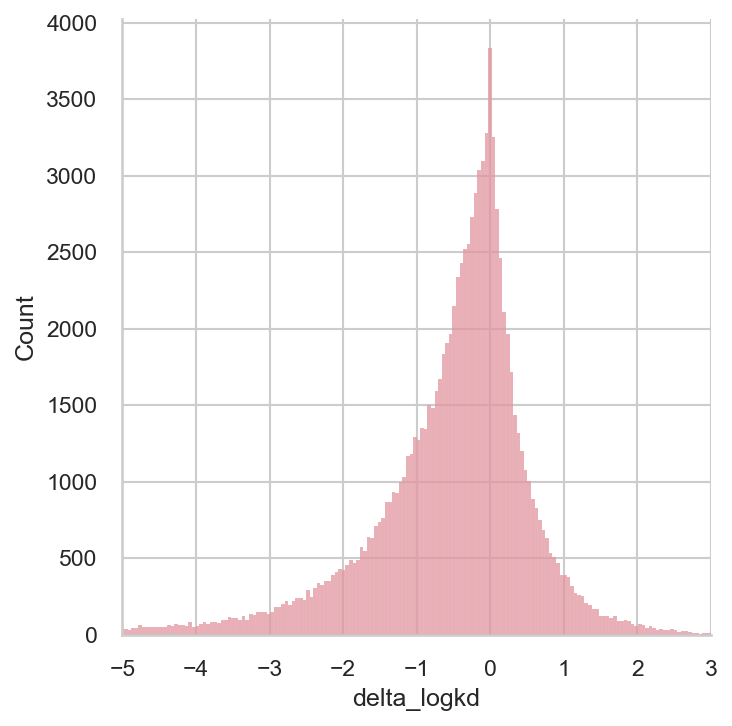

In [8]:
sns.displot(merged.delta_logkd)
plt.xlim([-5, 3])

In [9]:
# set pdb
merged["pdb_full"] = merged["pdb"]
merged["pdb"] = merged["pdb"].apply(lambda v: v[:4])

# fill complex where it's nan (to pdb) and set index
merged.index = merged["complex"].fillna(merged["pdb"])


In [10]:
merged["test"] = False

In [11]:
merged["mutation"] = merged["complex"].apply(lambda v: v.split("_")[1] if "_" in str(v) else "")
merged["filename"] = merged.apply(lambda row: row["filename"].replace("_1", "") if "_1" in str(row["filename"]) else
                          f"{row.pdb}_{row.ab_chain}_{row.ag_chain}_{row.mutation}.pdb", axis=1)
# df["mutation_code"] = df.apply(lambda L: L.complex.split('_')[-1], axis=1)

In [12]:
merged.iloc[0]

Unnamed: 0          6fe4_1
pdb                   6fe4
filename          6fe4.pdb
chains                  AH
-log(Kd)          8.017729
delta_g         -10.938139
validation             4.0
test                 False
delta_logkd            0.0
complex                NaN
labels                 NaN
chain_prot1            NaN
chain_prot2            NaN
ab_chain               NaN
ag_chain               NaN
orig_neglogkd     8.017729
pdb_full            6fe4_1
mutation                  
Name: 6fe4, dtype: object

In [13]:
merged.iloc[-1]

Unnamed: 0                       NaN
pdb                             4od2
filename         4od2_BA_S_CS79V.pdb
chains                           NaN
-log(Kd)                    9.224419
delta_g                          NaN
validation                       NaN
test                           False
delta_logkd                 0.188207
complex                   4od2_CS79V
labels                        0.2526
chain_prot1                       BA
chain_prot2                        S
ab_chain                          BA
ag_chain                           S
orig_neglogkd               9.036212
pdb_full                        4od2
mutation                       CS79V
Name: 4od2_CS79V, dtype: object

In [14]:
merged.dropna(axis=1, how='any').iloc[-1]

pdb                             4od2
filename         4od2_BA_S_CS79V.pdb
-log(Kd)                    9.224419
test                           False
delta_logkd                 0.188207
orig_neglogkd               9.036212
pdb_full                        4od2
mutation                       CS79V
Name: 4od2_CS79V, dtype: object

In [15]:
merged.dropna(axis=1, how='any').to_csv(snakemake.output[0])